# Calculate NDVI from Landsat 8 COGs on AWS

This is an example of using COGs from AWS to calculate NDVI for specific areas, removing the need to download and store large imagery.

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show
import geopandas as gpd
from rasterio.mask import mask
import os

This example uses the following tile. Normally you should select the appropriate tile based on the path and row of interest, along with the capture date.

Each band is stored in a separate TIFF file on the server. Since the only calculation we are interested in is NDVI, only URLs for bands 3 and 4 are used.

In [3]:
b4_url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/037/024/LC08_L1TP_037024_20200824_20200905_01_T1/LC08_L1TP_037024_20200824_20200905_01_T1_B4.TIF'
b3_url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/037/024/LC08_L1TP_037024_20200824_20200905_01_T1/LC08_L1TP_037024_20200824_20200905_01_T1_B3.TIF'

A mask is used to select only the portion of the image we are interested in. Setting a mask lets us avoid having to download the entire image, making processing faster and reducing overall resource usage.

In [4]:
# Load the shapefile as a GeoDataFrame
mask_gdf = gpd.read_file('mask_boundary.shp')

Download the red and NIR bands from the tile. These are the only bands of interest for calculating NDVI, which is why only these ones are downloaded.

This masks the downloaded image from the polygons in the boundary file. COGs will result in a significant boost in time and data by allowing you to download only the area of interest.

In [25]:
# Download the masked area of band 3
with rasterio.open(b3_url) as src:
    b3, b3_mask_transform = mask(dataset=src, shapes=mask_gdf.geometry, crop=True)

In [26]:
# Download the masked area of band 4
with rasterio.open(b4_url) as src:
    b4, b4_mask_transform = mask(dataset=src, shapes=mask_gdf.geometry, crop=True)

Calculate NDVI from the red and NIR bands.

Note: Numpy is set to ignore any errors associated with NoData values.

In [29]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate the NDVI
ndvi = (b4.astype(float) - b3.astype(float)) / (b4 + b3)

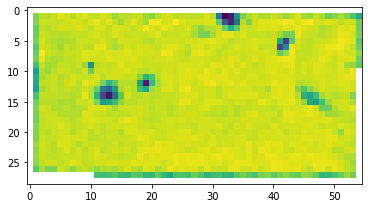

<AxesSubplot:>

In [30]:
show(ndvi)